In [0]:
!pip install prophet

Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


In [0]:
pip install xgboost

Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


In [0]:
pip install prophet

Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, make_scorer
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from prophet import Prophet
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA

In [0]:
# Load datasets
df = pd.read_csv('/Volumes/workspace/default/timeseries/train2.csv')
stores = pd.read_csv('/Volumes/workspace/default/timeseries/stores.csv')
items = pd.read_csv('/Volumes/workspace/default/timeseries/items.csv')
oil = pd.read_csv('/Volumes/workspace/default/timeseries/oil.csv')
holidays = pd.read_csv('/Volumes/workspace/default/timeseries/holidays_events.csv')
transactions = pd.read_csv('/Volumes/workspace/default/timeseries/transactions.csv')

In [0]:
display(df)

store_nbr item_nbr date id unit_sales onpromotion year month day day_of_week unit_sales_7d_avg 24 105574 2013-01-02 18790.0 12.0 false 2013 1 2 2 null 24 105574 2013-01-03 59692.0 1.0 false 2013 1 3 3 null 24 105574 2013-01-04 99664.0 3.0 false 2013 1 4 4 null 24 105574 2013-01-05 140805.0 4.0 false 2013 1 5 5 null 24 105574 2013-01-06 182800.0 7.0 false 2013 1 6 6 null 24 105574 2013-01-07 223895.0 3.0 false 2013 1 7 0 null 24 105574 2013-01-08 263107.0 3.0 false 2013 1 8 1 4.714285714285714 24 105574 2013-01-09 302232.0 7.0 false 2013 1 9 2 4.0 24 105574 2013-01-10 341031.0 3.0 false 2013 1 10 3 4.285714285714286 24 105574 2013-01-11 379570.0 6.0 false 2013 1 11 4 4.714285714285714 24 105574 2013-01-12 419992.0 7.0 false 2013 1 12 5 5.142857142857143 24 105574 2013-01-13 461982.0 1.0 false 2013 1 13 6 4.285714285714286 24 105574 2013-01-14 503263.0 2.0 false 2013 1 14 0 4.142857142857143 24 105574 2013-01-15 542633.0 3.0 false 2013 1 15 1 4.142857142857143 24 105574 2013-01-16 582439.0 19.0 false 2013 1 16 2 5.857142857142857 24 105574 2013-01-17 622074.0 7.0 false 2013 1 17 3 6.428571428571429 24 105574 2013-01-18 661498.0 8.0 false 2013 1 18 4 6.714285714285714 24 105574 2013-01-19 702769.0 5.0 false 2013 1 19 5 6.428571428571429 24 105574 2013-01-20 745653.0 3.0 false 2013 1 20 6 6.714285714285714 24 105574 2013-01-21 787427.0 4.0 false 2013 1 21 0 7.0 24 105574 2013-01-22 827199.0 2.0 false 2013 1 22 1 6.857142857142857 24 105574 2013-01-23 866631.0 3.0 false 2013 1 23 2 4.571428571428571 24 105574 2013-01-25 944619.0 3.0 false 2013 1 25 4 2.857142857142857 24 105574 2013-01-26 985906.0 5.0 false 2013 1 26 5 2.857142857142857 24 105574 2013-01-27 1028560.0 8.0 false 2013 1 27 6 3.571428571428572 24 105574 2013-01-28 1070112.0 3.0 false 2013 1 28 0 3.4285714285714284 24 105574 2013-01-29 1109714.0 4.0 false 2013 1 29 1 3.7142857142857135 24 105574 2013-01-30 1149321.0 1.0 false 2013 1 30 2 3.4285714285714284 24 105574 2013-01-31 1189067.0 1.0 false 2013 1 31 3 3.571428571428572 24 105574 2013-02-01 1229986.0 6.0 false 2013 2 1 4 4.0 24 105574 2013-02-02 1273695.0 7.0 false 2013 2 2 5 4.285714285714286 24 105574 2013-02-03 1317962.0 9.0 false 2013 2 3 6 4.428571428571429 24 105574 2013-02-04 1361053.0 3.0 false 2013 2 4 0 4.428571428571429 24 105574 2013-02-06 1443452.0 3.0 false 2013 2 6 2 4.142857142857143 24 105574 2013-02-07 1484057.0 4.0 false 2013 2 7 3 4.571428571428571 24 105574 2013-02-08 1524905.0 9.0 false 2013 2 8 4 5.0 24 105574 2013-02-09 1567294.0 7.0 false 2013 2 9 5 5.0 24 105574 2013-02-13 1728411.0 8.0 false 2013 2 13 2 4.0 24 105574 2013-02-14 1769551.0 2.0 false 2013 2 14 3 3.7142857142857135 24 105574 2013-02-15 1810118.0 6.0 false 2013 2 15 4 3.2857142857142856 24 105574 2013-02-16 1852513.0 4.0 false 2013 2 16 5 2.857142857142857 24 105574 2013-02-17 1895436.0 2.0 false 2013 2 17 6 3.142857142857143 24 105574 2013-02-18 1937146.0 3.0 false 2013 2 18 0 3.571428571428572 24 105574 2013-02-19 1978085.0 9.0 false 2013 2 19 1 4.857142857142857 24 105574 2013-02-20 2018753.0 12.0 false 2013 2 20 2 5.428571428571429 24 105574 2013-02-21 2059379.0 3.0 false 2013 2 21 3 5.571428571428571 24 105574 2013-02-23 2141528.0 3.0 false 2013 2 23 5 4.571428571428571 24 105574 2013-02-24 2184860.0 8.0 false 2013 2 24 6 5.428571428571429 24 105574 2013-02-25 2227233.0 4.0 false 2013 2 25 0 5.571428571428571 24 105574 2013-02-26 2268070.0 5.0 false 2013 2 26 1 5.0 24 105574 2013-02-27 2308585.0 5.0 false 2013 2 27 2 4.0 24 105574 2013-03-01 2390815.0 8.0 false 2013 3 1 4 4.714285714285714 24 105574 2013-03-02 2435397.0 11.0 false 2013 3 2 5 5.857142857142857 24 105574 2013-03-03 2480417.0 3.0 false 2013 3 3 6 5.142857142857143 24 105574 2013-03-05 2566767.0 2.0 false 2013 3 5 1 4.142857142857143 24 105574 2013-03-06 2608657.0 1.0 false 2013 3 6 2 3.571428571428572 24 105574 2013-03-07 2650122.0 7.0 false 2013 3 7 3 4.571428571428571 24 105574 2013-03-08 2690932.0 10.0 false 2013 3 8 4 4.857142857142857 24 105574 2013-03

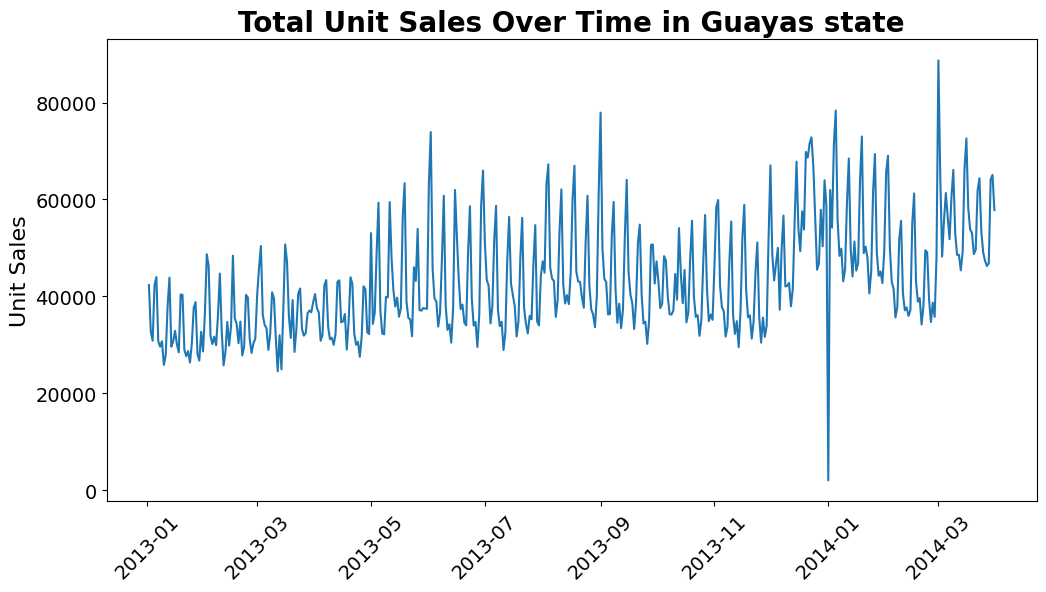

In [0]:
# Aggregating total sales by date
sales_by_date = df.groupby('date')['unit_sales'].sum()

# Plotting the time-series
plt.figure(figsize=(12,6))
plt.plot(sales_by_date.index, sales_by_date.values)
plt.title('Total Unit Sales Over Time in Guayas state', fontsize=20, fontweight='bold')
plt.ylabel('Unit Sales', fontsize=16)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.show()

In [0]:
print(df['date'].min()) # Identify the earliest date in the dataset
print(df['date'].max()) # Identify the latest date in the dataset

2013-01-02
2014-03-31


In [0]:
df['onpromotion'] = df['onpromotion'].apply(lambda x: 1 if x == 'True' else 0)
display(df['onpromotion'])

0          0
1          0
2          0
3          0
4          0
          ..
2747118    0
2747119    0
2747120    0
2747121    0
2747122    0
Name: onpromotion, Length: 2747123, dtype: int64

In [0]:
df.isnull().sum()

store_nbr                0
item_nbr                 0
date                     0
id                       0
unit_sales               0
onpromotion              0
year                     0
month                    0
day                      0
day_of_week              0
unit_sales_7d_avg    29995
dtype: int64

In [0]:
df_prophet = df

In [0]:
# Initialize the results dataframe
results = pd.DataFrame(columns=['Model', 'RMSLE', 'RMSE', 'MSE', 'MAE'])

## XGBoost

In [0]:
# Lag features (per store and item)

# Yesterday's sales, grouped by separate combinations of store-item (each item in each store has its own history)
df['lag_1'] = df.groupby(['store_nbr', 'item_nbr'])['unit_sales'].shift(1)
# Example: Yesterday had $100 in sales, today we will probably also see $100 in sales

# Last week's sales, similar to above
df['lag_7'] = df.groupby(['store_nbr', 'item_nbr'])['unit_sales'].shift(7)
# Example: Last Thursday had high milk sales, this Thursday will also see high milk sales

# Last month's sales, similar to above
df['lag_30'] = df.groupby(['store_nbr', 'item_nbr'])['unit_sales'].shift(30)
# Example: Last month saw good sales in vegetables, this month will see the same

In [0]:
# Rolling statistics - standard deviation over last 7 days
df['rolling_std_7'] = df.groupby(['store_nbr', 'item_nbr'])['unit_sales'].shift(1).rolling(window=7).std()

# Creates a new weekend variable and classifies it as 5 = Saturday and 6 = Sunday
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

# Creating training and testing datasets (simulate real world forecasting)
# Train is on or before 01JAN2014
# Test is after 01JAN2014
split_date = '2014-01-01'
train = df[df['date'] <= split_date]  # Remember we need to train the historical data ...
test = df[df['date'] > split_date]    # ... to test the future

In [0]:
# Define target variable (unit_sales) and features
X_train = train.drop('unit_sales', axis=1)  # Remove this column because we are trying to predict this
X_train = train.drop('date', axis=1)        # Remove the date column because we already have dating set up
y_train = train['unit_sales']               # We now have the predictor (y) set up

# We are conducting the exact same steps as above because we want to test the model after we trained it
X_test = test.drop('unit_sales', axis=1)    # Remove this column because we are trying to predict this
X_test = test.drop('date', axis=1)          # Remove the date column because we already have dating set up
y_test = test['unit_sales']                 # We now have the predictor (y) set up

In [0]:
# Initialize the XGBoost regressor model
xgboost_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    enable_categorical=True
)

# objective='reg:squarederror' => penalizes large errors, minimize MSE
# n_estimator=100 => number of decision trees
# max_depth=5 => size of the dataset we are training (3 as simple to 10+ not recommended)
# learning_rate=0.1 => how much each decision tree contributes to the prediction (keeps it stable)
# enable_categorical=True => enables the model to handle categorical data (will not help with prediction)

# A rule: increase of n_estimators means decrease the learning_rate

# Train the XGBoost model
xgboost_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [0]:
# After training the model, we are now testing the predictions
y_pred = xgboost_model.predict(X_test)

In [0]:
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))

RMSE: 5.415853388884771
MAE: 0.3282454142491866


In [0]:
# Add date back temporarily for grouping
test_with_date = test.copy()                  # Creates a copy of the original testing dataframe
test_with_date['y_pred'] = y_pred             # Adds the y_pred column from the above results
test_with_date['y_actual'] = y_test.values    # Adds the actual sales values as a new column

# Thus, we are comparing the y_actual to the y_pred to see how accurate the model performed

# Convert date column to datetime format to help with plotting of the data
test_with_date['date'] = pd.to_datetime(test_with_date['date'])

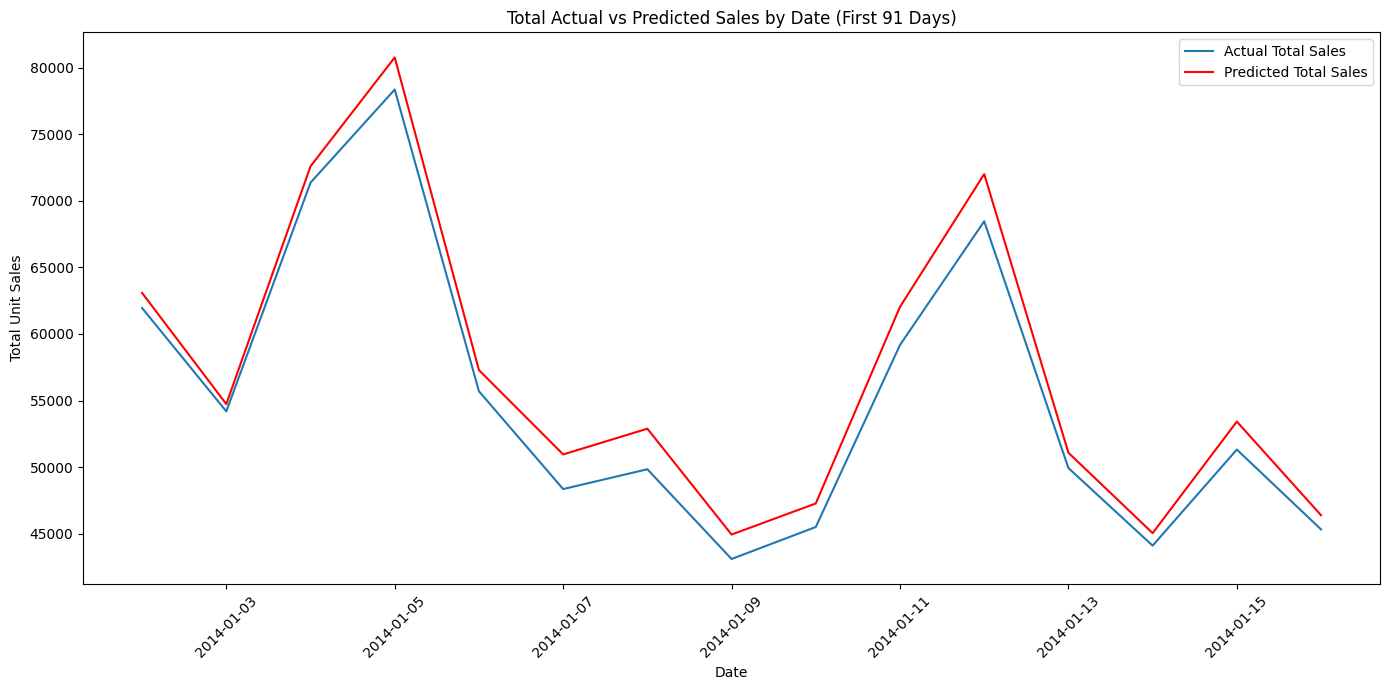

In [0]:
# Group rows with same date together, combines sales from all stores, items, hours for each day
# ONLY selecting these two columns (y_acutal and y_pred) to combine the data
plot_df = test_with_date.groupby('date')[['y_actual', 'y_pred']].sum()

i = 15
plt.figure(figsize=(14, 7))     # 14 inches by 7 inches
plt.plot(plot_df.index[:i], plot_df['y_actual'][:i], label='Actual Total Sales')
plt.plot(plot_df.index[:i], plot_df['y_pred'][:i], label='Predicted Total Sales', color='red')
plt.title('Total Actual vs Predicted Sales by Date (First 91 Days)')
plt.xlabel('Date')
plt.ylabel('Total Unit Sales')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

##Prophet


In [0]:
# Convert 'date' column to datetime format
df_prophet['date'] = pd.to_datetime(df_prophet['date'])

# Aggregate sales by date (sum all sales for each day)
daily_sales = df_prophet.groupby('date')['unit_sales'].sum().reset_index()

# Rename columns to Prophet's required format
# 'ds' = datestamp, 'y' = the value we want to forecast
prophet_df = daily_sales.rename(columns={'date': 'ds', 'unit_sales': 'y'})

print("✅ Data prepared for Prophet!")
print(f"\n📅 Date range: {prophet_df['ds'].min()} to {prophet_df['ds'].max()}")
print(f"📏 Total days: {len(prophet_df)} days")
print("\n👀 Prepared data:")
prophet_df.head(10)

✅ Data prepared for Prophet!

📅 Date range: 2013-01-02 00:00:00 to 2014-03-31 00:00:00
📏 Total days: 453 days

👀 Prepared data:


ds        y
0 2013-01-02  42320.0
1 2013-01-03  32708.0
2 2013-01-04  30849.0
3 2013-01-05  42351.0
4 2013-01-06  43988.0
5 2013-01-07  30711.0
6 2013-01-08  29607.0
7 2013-01-09  30738.0
8 2013-01-10  25853.0
9 2013-01-11  27865.0

/home/spark-15ad61c0-fb73-4ab4-9c02-71/.ipykernel/12731/command-7180925390137584-499617312:19: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/spark-15ad61c0-fb73-4ab4-9c02-71/.ipykernel/12731/command-7180925390137584-499617312:19: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/databricks/python/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/databricks/python/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


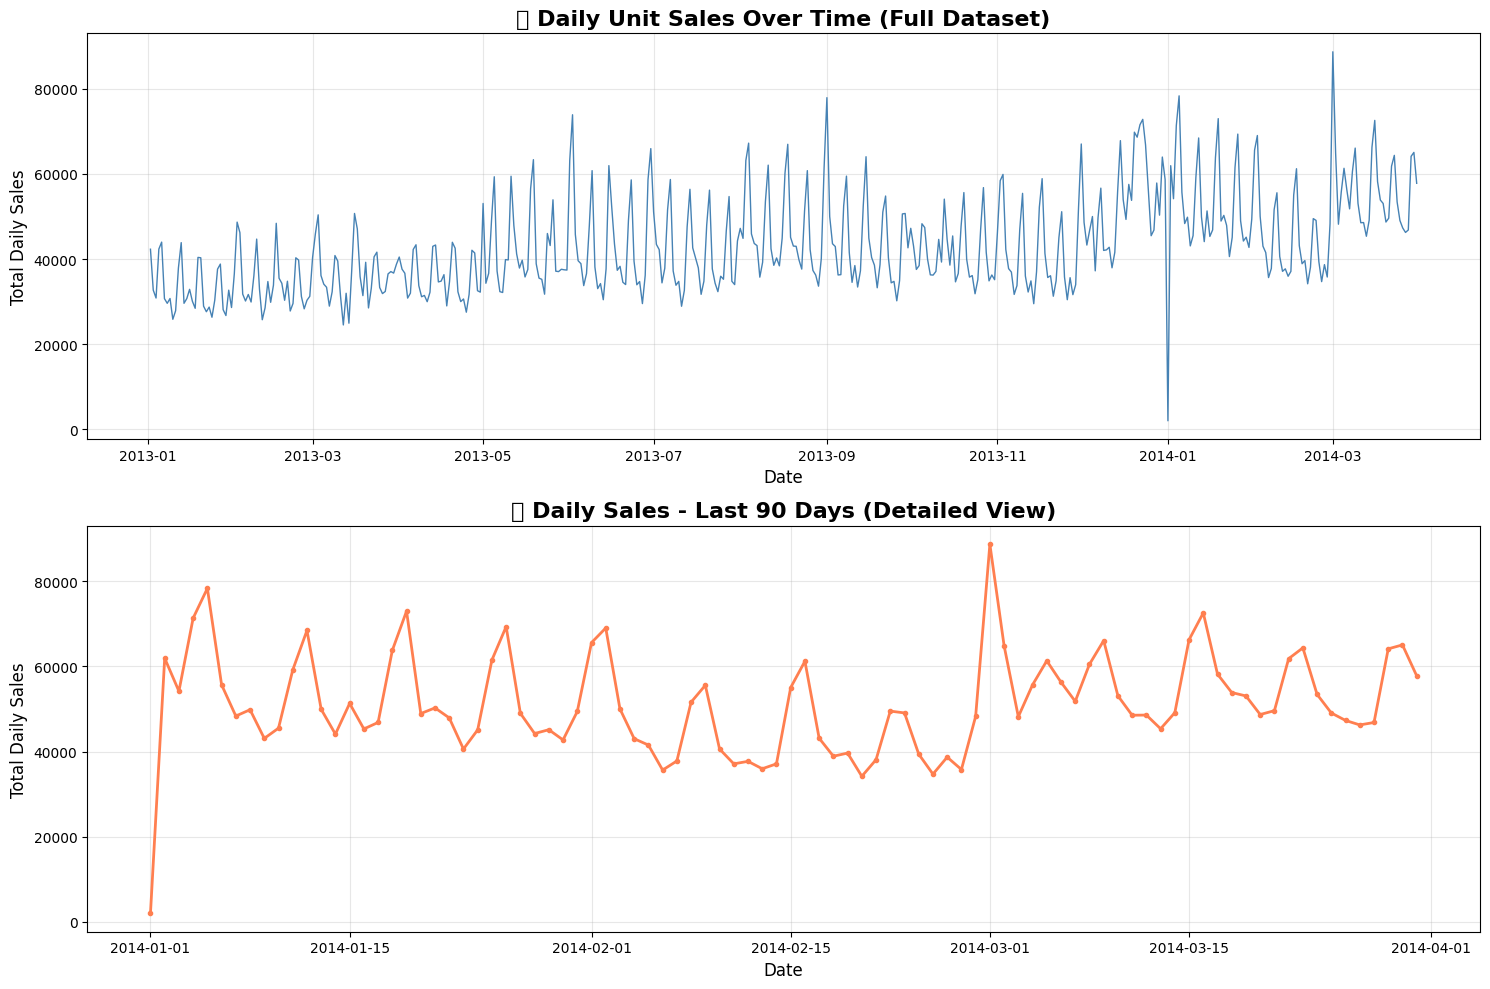


💡 What to look for:
   - Upward/downward trends
   - Weekly patterns (peaks and valleys)
   - Seasonal changes (monthly/yearly cycles)


In [0]:
# Create a comprehensive visualization
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Plot 1: Full time series
axes[0].plot(prophet_df['ds'], prophet_df['y'], color='steelblue', linewidth=1)
axes[0].set_title('📊 Daily Unit Sales Over Time (Full Dataset)', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Date', fontsize=12)
axes[0].set_ylabel('Total Daily Sales', fontsize=12)
axes[0].grid(True, alpha=0.3)

# Plot 2: Recent 90 days for detailed view
recent_data = prophet_df.tail(90)
axes[1].plot(recent_data['ds'], recent_data['y'], color='coral', linewidth=2, marker='o', markersize=3)
axes[1].set_title('🔍 Daily Sales - Last 90 Days (Detailed View)', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Date', fontsize=12)
axes[1].set_ylabel('Total Daily Sales', fontsize=12)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 What to look for:")
print("   - Upward/downward trends")
print("   - Weekly patterns (peaks and valleys)")
print("   - Seasonal changes (monthly/yearly cycles)")

In [0]:
# Create a basic Prophet model with default settings
print("🔧 Creating Basic Prophet model...\n")

model_basic = Prophet(
    daily_seasonality=False,     # We don't have hourly data, so no daily patterns
    weekly_seasonality=True,     # Detect weekly patterns (Mon-Sun cycles)
    yearly_seasonality=True,     # Detect yearly patterns (seasonal cycles)
    seasonality_mode='additive'  # Seasonal patterns add to the trend
)

print("⏳ Training the model... (this may take a minute)\n")

# Fit (train) the model on our data
model_basic.fit(prophet_df)

print("✅ Basic Prophet model trained successfully!")
print("\n📚 What the model learned:")
print(f"   - Overall trend direction")
print(f"   - Weekly sales patterns")
print(f"   - Yearly seasonal variations")

🔧 Creating Basic Prophet model...



20:58:36 - cmdstanpy - INFO - Chain [1] start processing
20:58:36 - cmdstanpy - INFO - Chain [1] done processing


⏳ Training the model... (this may take a minute)

✅ Basic Prophet model trained successfully!

📚 What the model learned:
   - Overall trend direction
   - Weekly sales patterns
   - Yearly seasonal variations


In [0]:
# Create a dataframe with future dates (let's predict 60 days ahead)
future_days = 60

print(f"📅 Creating dates for the next {future_days} days...\n")

# make_future_dataframe creates dates: includes historical + future dates
future_basic = model_basic.make_future_dataframe(periods=future_days, freq='D')

print(f"✅ Created {len(future_basic)} dates (historical + future)")
print(f"   - Last historical date: {prophet_df['ds'].max().strftime('%Y-%m-%d')}")
print(f"   - Last prediction date: {future_basic['ds'].max().strftime('%Y-%m-%d')}")

# Generate predictions
print("\n🔮 Generating predictions...\n")
forecast_basic = model_basic.predict(future_basic)

print("✅ Predictions complete!")
print("\n📊 Forecast columns explained:")
print("   - 'yhat': Predicted value (our best estimate)")
print("   - 'yhat_lower': Lower confidence bound (80% confidence)")
print("   - 'yhat_upper': Upper confidence bound (80% confidence)")
print("   - 'trend': The overall trend component")
print("   - 'weekly': Weekly seasonal component")
print("   - 'yearly': Yearly seasonal component")

# Display the last predictions (the actual forecast)
print(f"\n🔍 Last {min(10, future_days)} predictions:")
forecast_basic[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

📅 Creating dates for the next 60 days...

✅ Created 513 dates (historical + future)
   - Last historical date: 2014-03-31
   - Last prediction date: 2014-05-30

🔮 Generating predictions...

✅ Predictions complete!

📊 Forecast columns explained:
   - 'yhat': Predicted value (our best estimate)
   - 'yhat_lower': Lower confidence bound (80% confidence)
   - 'yhat_upper': Upper confidence bound (80% confidence)
   - 'trend': The overall trend component
   - 'weekly': Weekly seasonal component
   - 'yearly': Yearly seasonal component

🔍 Last 10 predictions:


ds          yhat    yhat_lower    yhat_upper
503 2014-05-21  57116.793721  49774.758385  64194.098084
504 2014-05-22  53927.265268  46719.132746  61311.562351
505 2014-05-23  57105.420749  49904.150601  64388.775163
506 2014-05-24  70144.113267  62552.913402  77590.703620
507 2014-05-25  73864.557547  66842.315169  81193.468033
508 2014-05-26  59444.962875  52195.330013  67064.576711
509 2014-05-27  55696.978693  48435.252867  63357.748126
510 2014-05-28  56239.124990  49148.576050  63323.798551
511 2014-05-29  52835.270457  45643.415429  60127.783916
512 2014-05-30  55838.816993  49016.072080  62910.459872

/home/spark-15ad61c0-fb73-4ab4-9c02-71/.ipykernel/12731/command-7180925390137587-1109764967:11: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/databricks/python/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


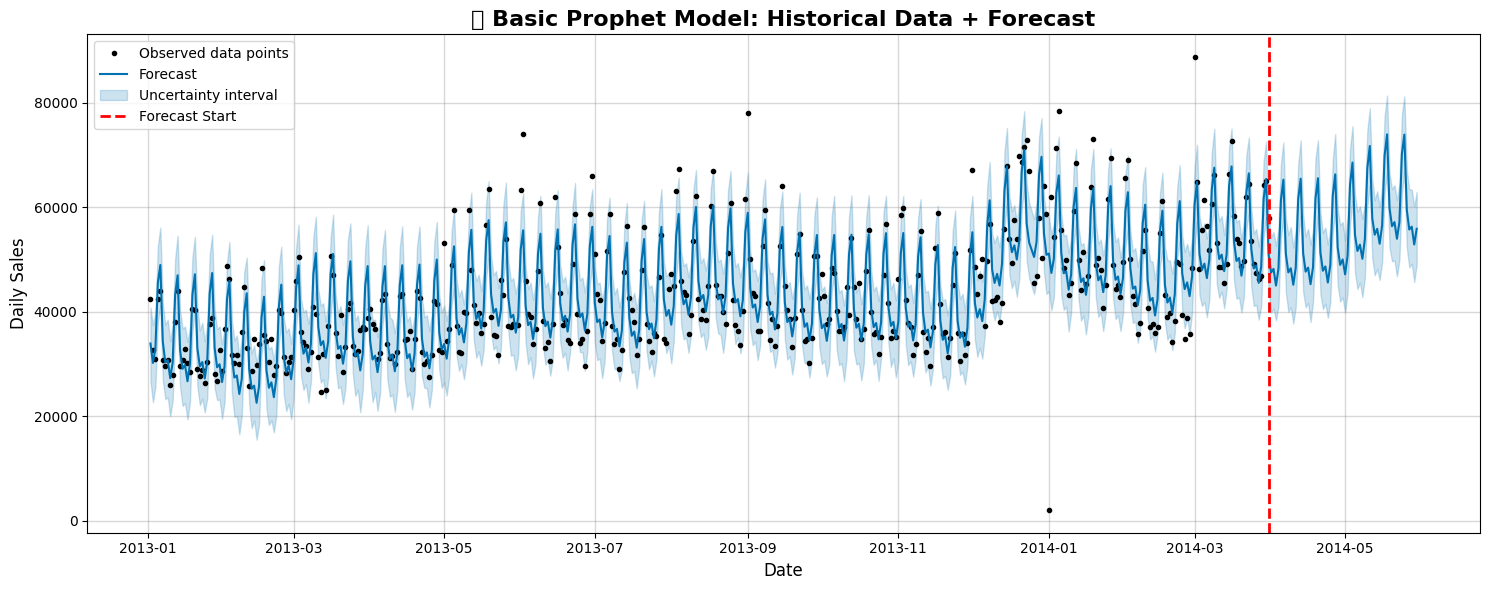


💡 How to read this chart:
   - Black dots: Actual historical sales
   - Blue line: Model's predictions
   - Light blue shaded area: Confidence interval (uncertainty range)
   - Red dashed line: Where forecast begins


In [0]:
# Create forecast visualization
fig = model_basic.plot(forecast_basic, figsize=(15, 6))
plt.title('📈 Basic Prophet Model: Historical Data + Forecast', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Daily Sales', fontsize=12)

# Add a vertical line to separate historical from forecast
plt.axvline(x=prophet_df['ds'].max(), color='red', linestyle='--', linewidth=2, label='Forecast Start')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n💡 How to read this chart:")
print("   - Black dots: Actual historical sales")
print("   - Blue line: Model's predictions")
print("   - Light blue shaded area: Confidence interval (uncertainty range)")
print("   - Red dashed line: Where forecast begins")

##ARIMA

In [0]:
# Define the (p, d, q) parameters for ARIMA
ARIMA_order = (2, 1, 1)

# Initialize the model
ARIMA_model = ARIMA(y_train, order=ARIMA_order)

# Fit the model
ARIMA_model_fit = ARIMA_model.fit()

# Make predictions
ARIMA_start = len(y_train)
ARIMA_end = len(y_train) + len(y_test) - 1
ARIMA_pred = ARIMA_model_fit.predict(start=ARIMA_start, end=ARIMA_end)

# Calculate evaluation metrics
ARIMA_mae = mean_absolute_error(y_test, ARIMA_pred)
ARIMA_mse = mean_squared_error(y_test, ARIMA_pred)
ARIMA_rmse = np.sqrt(ARIMA_mse)
ARIMA_msle = mean_squared_log_error(y_test, ARIMA_pred)
ARIMA_rmsle = np.sqrt(ARIMA_msle)

# Create a dictionary for the evaluation metrics of ARIMA model
ARIMA_evaluation_metrics = pd.DataFrame({'Model': ['ARIMA'], 'MAE': [ARIMA_mae], 'MSE': [ARIMA_mse], 'RMSE': [ARIMA_rmse], 'MSLE': [ARIMA_msle],
                                      'RMSLE': [ARIMA_rmsle]})

/databricks/python/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/databricks/python/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/databricks/python/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/databricks/python/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available.

In [0]:
# Add the ARIMA evaluation metrics to the results DataFrame, then print the results DataFrame
results = pd.concat([results, ARIMA_evaluation_metrics], ignore_index=True)
results

/home/spark-15ad61c0-fb73-4ab4-9c02-71/.ipykernel/12731/command-7180925390137591-2860516248:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, ARIMA_evaluation_metrics], ignore_index=True)


Model    RMSLE       RMSE         MSE       MAE      MSLE
0  ARIMA  0.85506  14.013654  196.382491  5.696371  0.731128